In [1]:
from fipy import *
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

nx = 30
ny = 30
dx = 1.0
dy = 1.0

L = dx*nx

In [2]:
mesh = Grid2D(dx = dx, dy = dy, nx = nx, ny=ny)
phase = CellVariable(name = "phase",mesh = mesh)

x = mesh.cellCenters[0]
y = mesh.cellCenters[1]



# Fields required to solve the problem

## $ \phi(\textbf{r}) $

# Tensors required to solve the elasticity problem 

## $ \epsilon^{00}(p) , C_{ijkl}(p) $ 

### p refers to the p-th variant.

* $ E_{el} = \frac{1}{V} \epsilon_{ij}^{00}(p) C_{ijkl} \epsilon_{kl}^{00}(p) \int \phi_p (r) dV  - \frac{1}{2V} \big(\int \phi_p (r) dV \big)^2 \epsilon_{ij}^{00}(p) C_{ijkl} \epsilon_{kl}^{00}(p) - \frac{1}{2V} \int B_{pq}(\frac{k}{\bar{k}}) \tilde{\phi_p}(k)^2 exp(ik.r)\frac{d^3 k}{(2*\pi)^3} $





* $ (E_{el} = E_{SFTS} + E_{homo}^{relax} + E_{hetero}^{relax}) $ 






* $ \dfrac{\delta E_{el}}{\delta \phi_p} = \frac{1}{V} \epsilon_{ij}^{00}(p) C_{ijkl} \epsilon_{kl}^{00}(p) - \frac{1}{V}\epsilon_{ij}^{00}(p) C_{ijkl} \epsilon_{kl}^{00}(p) \int \phi_p (r) dV  - \frac{1}{V} \int B_{pq}(\frac{\textbf{k}}{k}) \tilde{\phi_p}(\textbf{k}) exp(i\textbf{k}.r) \frac{d^3 \textbf{k}}{(2*\pi)^3} $

### Briefly summarising Fourier transforms : 

* A function f(r) in the real space is transformed to F(k) in the Fourier space by $ F(k) = \int_{-\infty}^{\infty}f(x) e^{-ikx} dx $



* The function F(k) in the Fourier space is transformed to f(r) in the real space by $ f(r) = \int_{-\infty}^{\infty} F(k) e^{ikr} \frac{d^3k}{(2\pi)^3} $

### Coming back to our equations


* Looking back at the heterogeneous component of $\dfrac{\delta E_{el}}{\delta \phi_p}$, we are essentially calculating the inverse Fourier transform of $F = B_{pq}(\frac{\textbf{k}}{k}) \tilde{\phi_p}(\textbf{k})$


* In the subsequent equations, $ \Omega_{jk}$ refers to $ \Omega_{jk}\big(\frac{k}{|k|}\big)$


* $B_{pq}(\frac{\textbf{k}}{k}) = \dfrac{k_i}{|k|}\,\sigma_{ij}^0 \,\Omega_{jk}\,   \sigma_{kl}^0 \, \dfrac{k_l}{|k|}$


### Expanding the tensor form 

* Since we are solving for 2D, i,j,k, and l range from 1 to 2. 

#### Expanding l 

* $B_{pq}(\frac{\textbf{k}}{k}) = \dfrac{k_i}{|k|}\,\sigma_{ij}^0 \,\Omega_{jk}\, \big(  \sigma_{k1}^0 \, \dfrac{k_1}{|k|} + \sigma_{k2}^0 \, \dfrac{k_2}{|k|}\big)$


#### Expanding k


* $B_{pq}(\frac{\textbf{k}}{k}) = \dfrac{k_i}{|k|}\,\sigma_{ij}^0 \, \big(\Omega_{j1}\, \big(  \sigma_{11}^0 \, \dfrac{k_1}{|k|} + \sigma_{12}^0 \, \dfrac{k_2}{|k|}\big) + \Omega_{j2}\, \big(  \sigma_{21}^0 \, \dfrac{k_1}{|k|} + \sigma_{22}^0 \, \dfrac{k_2}{|k|}\big) \big)$ 


#### Expanding j 

* $B_{pq}(\frac{\textbf{k}}{k}) = \dfrac{k_i}{|k|}\,\big(\sigma_{i1}^0 \, \big(\Omega_{11}\, \big(  \sigma_{11}^0 \, \dfrac{k_1}{|k|} + \sigma_{12}^0 \, \dfrac{k_2}{|k|}\big) + \Omega_{12}\, \big(  \sigma_{21}^0 \, \dfrac{k_1}{|k|} + \sigma_{22}^0 \, \dfrac{k_2}{|k|}\big) \big)     +     \sigma_{i2}^0 \, \big(\Omega_{21}\, \big(  \sigma_{11}^0 \, \dfrac{k_1}{|k|} + \sigma_{12}^0 \, \dfrac{k_2}{|k|}\big) + \Omega_{22}\, \big(  \sigma_{21}^0 \, \dfrac{k_1}{|k|} + \sigma_{22}^0 \, \dfrac{k_2}{|k|}\big) \big)\big)$


#### Expanding i 
* $B_{pq}(\frac{\textbf{k}}{k}) = \dfrac{k_1}{|k|}\,\big(\sigma_{11}^0 \, \big(\Omega_{11}\, \big(  \sigma_{11}^0 \, \dfrac{k_1}{|k|} + \sigma_{12}^0 \, \dfrac{k_2}{|k|}\big) + \Omega_{12}\, \big(  \sigma_{21}^0 \, \dfrac{k_1}{|k|} + \sigma_{22}^0 \, \dfrac{k_2}{|k|}\big) \big)  +  \sigma_{12}^0 \, \big(\Omega_{21}\, \big(  \sigma_{11}^0 \, \dfrac{k_1}{|k|} + \sigma_{12}^0 \, \dfrac{k_2}{|k|}\big) + \Omega_{22}\, \big(  \sigma_{21}^0 \, \dfrac{k_1}{|k|} + \sigma_{22}^0 \, \dfrac{k_2}{|k|}\big) \big)\big)     +       \dfrac{k_2}{|k|}\,\big(\sigma_{21}^0 \, \big(\Omega_{11}\, \big(  \sigma_{11}^0 \, \dfrac{k_1}{|k|} + \sigma_{12}^0 \, \dfrac{k_2}{|k|}\big) + \Omega_{12}\, \big(  \sigma_{21}^0 \, \dfrac{k_1}{|k|} + \sigma_{22}^0 \, \dfrac{k_2}{|k|}\big) \big)     +     \sigma_{22}^0 \, \big(\Omega_{21}\, \big(  \sigma_{11}^0 \, \dfrac{k_1}{|k|} + \sigma_{12}^0 \, \dfrac{k_2}{|k|}\big) + \Omega_{22}\, \big(  \sigma_{21}^0 \, \dfrac{k_1}{|k|} + \sigma_{22}^0 \, \dfrac{k_2}{|k|}\big) \big)\big)$


* $\Omega_{ij}$ is defined as $\big(C_{ijkl} \, \dfrac{k_k}{|k|} \, \dfrac{k_l}{|k|}\big)^{-1} $


* $\Omega_{ij}^{-1} = \dfrac{1}{|k|^2}\big(C_{ij11}k_1^2 + 2*C_{ij12}k_1 k_2 + C_{ij22}k_2^2 \big)$


* Here, we adopt the notation (11) $\to$ 1 , (22) $\to$ 2, (12) $\to$ 3 


* $\Omega_{ij}^{-1} = \dfrac{1}{|k|^2}\big(C_{ij1}k_1^2 + 2C_{ij3}k_1 k_2 + C_{ij2}k_2^2 \big)$


* As an example, $\Omega_{12}^{-1} = \dfrac{1}{|k|^2}\big(C_{31}k_1^2 + 2C_{33}k_1 k_2 + C_{32}k_2^2 \big)$


#### Index Reduction

1 $\to$ 11 , 2 $\to$ 22, 3 $\to$ 12



### Synopsis of the algorithm

Step 1 $\to$ Get the cell centres of the 2D mesh 

Step 2 $\to$ Calculate the FT of the nx-sized 1D array that contains the x components of the cell centres. Repeat the same procedure for the y components of the cell centres. We now have $k_x, k_y$ in the fourier space. 

        Fast Fourier Transform can be performed with numpy's fft.fft function. Example : x_fourier = np.fft.fft(x)

Step 3 $\to$ Calculate the FT of the phase field. 

Step 4 $\to$ Calculate $B_{pq}(\textbf{k}) \times \phi_p(\textbf{k})$. Call it as hetero_strain_energy_fourier

Step 5 $\to$ Calculate the inverse fourier transform of hetero_strain_energy_fourier. Call it hetero_strain_energy.

        Inverse FFT can be performed with numpy's fft.ifft. 
        Example : hetero_strain_energy = np.fft.ifft(hetero_strain_energy_fourier). For 2D, use fft2 and ifft2 instead of fft and ifft. Make sure that the arrays are of proper shape. 
        
Step 6 $\to$ Add the hetero_strain_energy to the SFTS energy and the homogeneous component of the strain energy 

In [3]:

phase.setValue(1.)
phase.setValue(0., where=((x-0.5*L)**2 +(y-0.5*L)**2 > L/81))



kappa = 0.0025
W = 1.
Lv = 1.
Tm = 1.
T = Tm
enthalpy = Lv * (T - Tm) / Tm
    

In [4]:
rx = np.array([i*dx for i in range(nx)])
ry = np.array([j*dy for j in range(ny)])
#for i in range(nx):
#    x_1d.append(0.02*i + 0.01)
#    y_1d.append(0.02*i + 0.01)
    
n_value = np.fft.fftfreq( nx , (L / nx ) )

kx = np.zeros( (nx,ny) , dtype = float )
ky = np.zeros( (nx,ny) , dtype = float )


x_length = np.max(rx) - np.min(rx)
y_length = np.max(ry) - np.min(ry)

for row in range(nx):
    for column in range(ny):
        kx[row][column] = ( 2.0 * np.pi * n_value[column] ) / x_length + 0.1
        ky[row][column] = ( 2.0 * np.pi * n_value[row] ) / y_length + 0.11



/home/arun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:79: ComplexWarning: Casting complex values to real discards the imaginary part


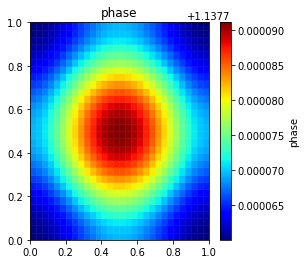

In [5]:
from numpy.linalg import inv

cval = 0.00001

c11 = cval
c12 = cval
c13 = cval

c21 = cval
c22 = cval
c23 = cval

c31 = cval
c32 = cval
c33 = cval

C = [[c11,c12,c13],[c21,c22,c23],[c31,c32,c33]]

epsi00_1 = 3.3 # + 0.0j
epsi00_2 = -3.3 # + 0.0j
epsi00_3 = 0.001 # + 0.0j


sigma00_1 = c11*epsi00_1 + c12*epsi00_2 + c13*epsi00_3
sigma00_2 = c21*epsi00_1 + c22*epsi00_2 + c23*epsi00_3
sigma00_3 = c31*epsi00_1 + c32*epsi00_2 + c33*epsi00_3

sfts_energy = (epsi00_1*c11*epsi00_1 + epsi00_1*c12*epsi00_2 + epsi00_1*c13*epsi00_3 + epsi00_2*c21*epsi00_1
               + epsi00_2*c22*epsi00_2 + epsi00_2*c23*epsi00_3 + epsi00_3*c31*epsi00_1 + epsi00_3*c32*epsi00_2 + 
                       epsi00_3*c33*epsi00_3)


def omega(k1,k2,modk):
    omega11 = ((1/(modk**2))*(c11*k1**2 + 2*c13*k1*k2 + c12*k2**2))
    omega22 = ((1/(modk**2))*(c21*k1**2 + 2*c23*k1*k2 + c22*k2**2))
    omega12 = ((1/(modk**2))*(c31*k1**2 + 2*c33*k1*k2 + c32*k2**2))
    omega21 = ((1/(modk**2))*(c31*k1**2 + 2*c33*k1*k2 + c32*k2**2))
    omega_mat = np.array([[omega11, omega12],[omega21, omega22]])
    omega_inv = np.linalg.pinv(omega_mat)
    return omega_inv


def B(k1, k2, modk, omega_inv):
    term1 = sigma00_1*(omega_inv[0][0]*(sigma00_1*k1/modk + sigma00_3*k2/modk) + omega_inv[0][1]*(sigma00_3*k1/modk + sigma00_2*k2/modk))
    term2 = sigma00_3*(omega_inv[0][1]*(sigma00_1*k1/modk + sigma00_3*k2/modk) + omega_inv[1][1]*(sigma00_3*k1/modk + sigma00_2*k2/modk))
    term3 = sigma00_3*(omega_inv[0][0]*(sigma00_1*k1/modk + sigma00_3*k2/modk) + omega_inv[0][1]*(sigma00_3*k1/modk + sigma00_2*k2/modk))
    term4 = sigma00_2*(omega_inv[0][1]*(sigma00_1*k1/modk + sigma00_3*k2/modk) + omega_inv[1][1]*(sigma00_3*k1/modk + sigma00_2*k2/modk))
    
    return ((k1/modk)*(term1 + term2) + (k2/modk)*(term3 + term4))

F = np.ones((nx,nx))#, dtype=complex)

hetero_strain_energy = np.ones(nx*nx)

#*np.ones((nx,nx))

mPhi = -((1 - 2 * phase) * W + 30 * phase * (1 - phase) * enthalpy)
S0 = mPhi * phase * (1 - phase)  - (1/L**2)*sfts_energy*phase + (1/L**2)*numerix.sum(phase)*sfts_energy + (1/5*L**2)*hetero_strain_energy
eq = TransientTerm(coeff = 100.0) == DiffusionTerm(coeff=kappa) + S0


%matplotlib inline

viewer = Matplotlib2DViewer(vars=phase, limits={'ymin': 0.0, 'ymax': 1.0})

for i in range(1000):
    #print(i)
    phase_a = np.array(phase) #phase.value
    phase2D = phase_a.reshape((nx,nx))
    phase_four = np.fft.fft2(phase2D)
    for j in range(nx):
        for k in range(ny):
            k1 = kx[j][k]
            k2 = ky[j][k]
            modk = (np.sqrt(k1**2 + k2**2))
            if(modk==0.0):
                modk=0.001    
            omega_inv = omega(k1,k2,modk)
            F[j][k] = B(k1, k2, modk, omega_inv)*phase_four[j][k]  #What is modk? 
    hetero_strain_e = (np.fft.ifft2(F)).real
    hetero_strain_energy = hetero_strain_e.reshape(nx*nx,1) #field.val 
    #print(mPhi * phase * (1 - phase))
    #print((1/10*L**2)*hetero_strain_energy)
    #print(- (1/L**2)*sfts_energy*phase + (1/L**2)*numerix.sum(phase)*sfts_energy + (1/10*L**2)*hetero_strain_energy)
    eq.solve(var = phase, dt=1.0)
    if __name__ == '__main__':
        viewer.plot()


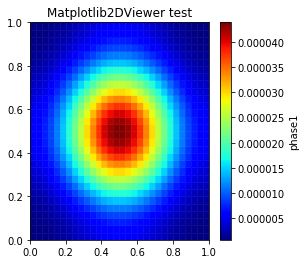

In [6]:
from numpy.linalg import inv

phase1 = CellVariable(name = "phase1",mesh = mesh)
phase1.setValue(1.)
phase1.setValue(0., where=((x-0.5*L)**2 +(y-0.5*L)**2 > L/81))


#*np.ones((nx,nx))

mPhi = -((1 - 2 * phase1) * W + 30 * phase1 * (1 - phase1) * enthalpy)
S0 = mPhi * phase1 * (1 - phase1)#  - (1/L**2)*sfts_energy - (1/L**2)*numerix.sum(phase)*sfts_energy + (1/10*L**2)*hetero_strain_energy
eq = TransientTerm(coeff = 100.0) == DiffusionTerm(coeff=kappa) + S0



viewer = Matplotlib2DViewer(vars=phase1, limits={'ymin': 0.0, 'ymax': 1.0},title="Matplotlib2DViewer test")

for i in range(1000):
    #print(i)
   
    eq.solve(var = phase1, dt=1.0)
    if __name__ == '__main__':
        viewer.plot()